In [17]:
import numpy as np
import keras
from keras import datasets, regularizers
from keras.models import Sequential  ### type of the model
from keras.layers import Dense ## type of layer
from tensorflow.keras import optimizers

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

In [21]:
y_test.ndim

2

In [22]:
y_test.shape

(10000, 1)

In [23]:
y_train = keras.utils.to_categorical(y_train, 10)  ### One Hot Encodeing of training data (10 classes = 10 columns)
y_test = keras.utils.to_categorical(y_test, 10)    ### One Hot Encodeing of test data

In [24]:
y_test.ndim

2

In [25]:
# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [26]:
# One-hot encoding of labels
y_train = keras.utils.to_categorical(y_train, 10).reshape(-1, 10)
y_test =  keras.utils.to_categorical(y_test, 10).reshape(-1, 10)

In [27]:
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)


In [28]:
model = Sequential(
    [
        Dense(512, activation='relu', input_shape=(32*32*3,)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,546 (7.64 MB)

 Trainable params: 2,001,546 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
result=model.fit(x_train, y_train,epochs=20,batch_size=64,validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8828 - loss: 0.4075 - val_accuracy: 0.9000 - val_loss: 0.3328
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8969 - loss: 0.3403 - val_accuracy: 0.9000 - val_loss: 0.3261
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.8985 - loss: 0.3302 - val_accuracy: 0.9000 - val_loss: 0.3254
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.8977 - loss: 0.3311 - val_accuracy: 0.9000 - val_loss: 0.3255
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9005 - loss: 0.3260 - val_accuracy: 0.9000 - val_loss: 0.3257
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9012 - loss: 0.3232 - val_accuracy: 0.9000 - val_loss: 0.3269
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9005 - loss: 0.3247 - val_accuracy: 0.9000 - val_loss: 0.3251
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8995 - loss: 0.3268 - 

Text(0, 0.5, 'losss')

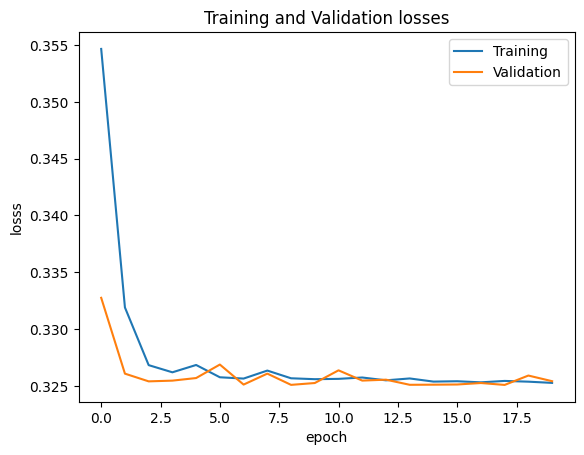

In [32]:
result.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('losss')